In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.svm import SVC, SVR
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

In [ ]:
#ID Identification
#Income Income in $10,000’s
#Limit Credit limit
#Rating Credit rating
#Cards Number of credit cards
#Age Age in years
#Education Number of years of education
#Gender A factor with levels Male and Female
#Student A factor with levels No and Yes indicating whether the individual was a student
#Married A factor with levels No and Yes indicating whether the individual was married
#Ethnicity A factor with levels African American, Asian, and Caucasian indicating the individual’s ethnicity
#Balance Average credit card balance in $.

In [2]:
df = pd.read_csv("Credit.csv")

In [3]:
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
Income       400 non-null float64
Limit        400 non-null int64
Rating       400 non-null int64
Cards        400 non-null int64
Age          400 non-null int64
Education    400 non-null int64
Gender       400 non-null object
Student      400 non-null object
Married      400 non-null object
Ethnicity    400 non-null object
Balance      400 non-null int64
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


In [5]:
df.describe()

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


In [3]:
df2 = pd.get_dummies(df)
df2.dtypes.value_counts()
df3 = df2[["Income", "Limit", "Rating", "Cards", "Age", "Education", "Balance", "Gender_ Male", "Student_Yes", "Married_Yes", "Ethnicity_African American", "Ethnicity_Asian", "Ethnicity_Caucasian"]]
df3.head()

,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_ Male,Student_Yes,Married_Yes,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian
0,14.891,3606,283,2,34,11,333,1,0,1,0,0,1
1,106.025,6645,483,3,82,15,903,0,1,1,0,1,0
2,104.593,7075,514,4,71,11,580,1,0,0,0,1,0
3,148.924,9504,681,3,36,11,964,0,0,0,0,1,0
4,55.882,4897,357,2,68,16,331,1,0,1,0,0,1


In [7]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
Income                        400 non-null float64
Limit                         400 non-null int64
Rating                        400 non-null int64
Cards                         400 non-null int64
Age                           400 non-null int64
Education                     400 non-null int64
Balance                       400 non-null int64
Gender_ Male                  400 non-null uint8
Student_Yes                   400 non-null uint8
Married_Yes                   400 non-null uint8
Ethnicity_African American    400 non-null uint8
Ethnicity_Asian               400 non-null uint8
Ethnicity_Caucasian           400 non-null uint8
dtypes: float64(1), int64(6), uint8(6)
memory usage: 24.3 KB


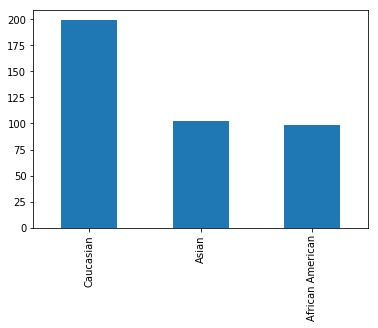

In [8]:
df['Ethnicity'].value_counts().plot.bar()

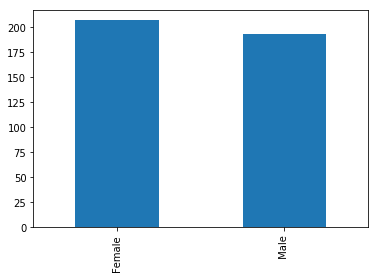

In [9]:
df['Gender'].value_counts().plot.bar()

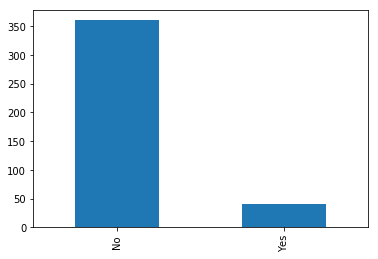

In [10]:
df['Student'].value_counts().plot.bar()

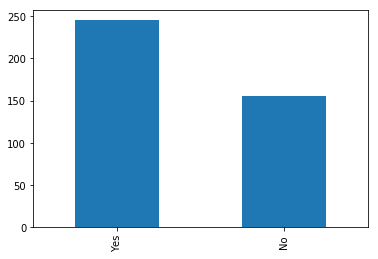

In [11]:
df['Married'].value_counts().plot.bar()

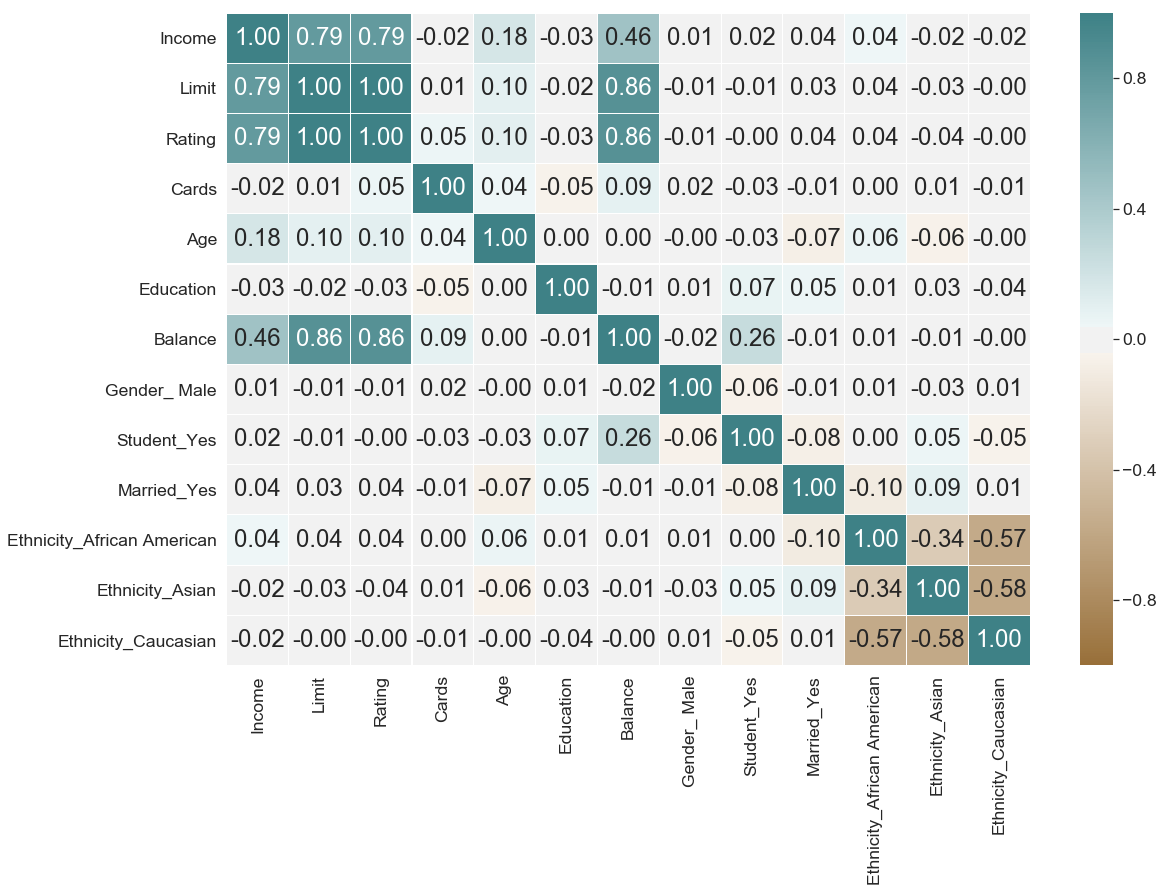

In [12]:
sns.set(font_scale=1.6)
fig, (ax) = plt.subplots(figsize=(18, 12))

corr = df3.corr()
ax = sns.heatmap( corr, center=0, vmin=-1, vmax=1, cmap=sns.diverging_palette(50, 200, as_cmap=True),
                     annot=True, fmt='.2f', annot_kws={"size": 24}, linewidths=.05)
plt.show()

In [4]:
# utworzenie kolumny do klasyfikacji na podstawie 
df3["Rating_Y"] = df3.loc[:, "Rating"]
df3.loc[df3["Rating_Y"]< 250, "Rating_Y" ] = 0 # nie dostanie
df3.loc[(df3["Rating_Y"]>= 250) &  (df3["Rating_Y"]<= 400), "Rating_Y" ] = 1 # do weryfikacji
df3.loc[df3["Rating_Y"]> 400, "Rating_Y" ] = 2 # dostanie kredyt
df3.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_ Male,Student_Yes,Married_Yes,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian,Rating_Y
0,14.891,3606,283,2,34,11,333,1,0,1,0,0,1,1
1,106.025,6645,483,3,82,15,903,0,1,1,0,1,0,2
2,104.593,7075,514,4,71,11,580,1,0,0,0,1,0,2
3,148.924,9504,681,3,36,11,964,0,0,0,0,1,0,2
4,55.882,4897,357,2,68,16,331,1,0,1,0,0,1,1


# Część 1. Nowy klient

## Regresja - czy nowy klient dostanie kredyt?  - wyliczanie ratingu, na podstawie, którego będzie dokonywana decyzja

In [5]:
# załadowanie danych i podzielenie na testowe i treningowe
x_nowy2 = df3[["Income", "Age", "Education", "Gender_ Male", "Student_Yes", "Married_Yes", "Ethnicity_African American", "Ethnicity_Asian", "Ethnicity_Caucasian"]]
y_nowy2 = df3[["Rating"]]

x_nowy_train2, x_nowy_test2, y_nowy_train2, y_nowy_test2 = train_test_split(x_nowy2, y_nowy2, test_size=0.1, random_state=42)

# normalizacja danych
scaler = MinMaxScaler()
scaler.fit(x_nowy_train2)
x_nowy_train_normalized2 = scaler.transform(x_nowy_train2)
x_nowy_test_normalized2 = scaler.transform(x_nowy_test2)

# normalizacja danych 2
scaler2 = StandardScaler()
scaler2.fit(x_nowy_train2)
x_nowy_train_scaler2 = scaler2.transform(x_nowy_train2)
x_nowy_test_scaler2 = scaler2.transform(x_nowy_test2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.


#### SVR

In [6]:
#svr_regressor2 = SVR()
#svr_cvs2 = cross_val_score(svr_regressor2, x_nowy_train_normalized2, y_nowy_train2, cv=5).mean()
#svr_regressor2.fit(x_nowy_train_normalized2, y_nowy_train2)
#svr_score2 = svr_regressor2.score(x_nowy_test_normalized2, y_nowy_test2)

#print('cross_val_score:', svr_cvs2, 'score:', svr_score2)


# StandardScaler dalej te same wyniki
svr_regressor2 = SVR()
svr_cvs2 = cross_val_score(svr_regressor2, x_nowy_train_scaler2, y_nowy_train2, cv=5).mean()
svr_regressor2.fit(x_nowy_train_scaler2, y_nowy_train2)
svr_score2 = svr_regressor2.score(x_nowy_test_scaler2, y_nowy_test2)

print('cross_val_score:', svr_cvs2, 'score:', svr_score2)

cross_val_score: 0.024466226551902625 score: -0.0339700838333854


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to

#### KNeighborsRegressor

In [7]:
# utworzenie regresora i ocena skuteczności
knn_regressor2 = KNeighborsRegressor()
knn_cvs2 = cross_val_score(knn_regressor2, x_nowy_train_normalized2, y_nowy_train2, cv=5).mean()
knn_regressor2.fit(x_nowy_train_normalized2, y_nowy_train2)
knn_score2 = knn_regressor2.score(x_nowy_test_normalized2, y_nowy_test2)

print('cross_val_score:', knn_cvs2, 'score:', knn_score2)

cross_val_score: 0.29663356389039464 score: 0.31180039880687527


#### RadiusNeighborsRegressor

In [8]:
# utworzenie regresora i ocena skuteczności
rnn_regressor2 = RadiusNeighborsRegressor()
rnn_cvs2 = cross_val_score(rnn_regressor2, x_nowy_train_normalized2, y_nowy_train2, cv=5).mean()
rnn_regressor2.fit(x_nowy_train_normalized2, y_nowy_train2)
rnn_score2 =rnn_regressor2.score(x_nowy_test_normalized2, y_nowy_test2)

print('cross_val_score:', rnn_cvs2, 'score:', rnn_score2)

cross_val_score: -2.784797163513126e+31 score: -0.06272916528058081


#### RandomForestRegressor

In [14]:
# utworzenie regresora i ocena skuteczności
rf_regressor2 = RandomForestRegressor()
rf_cvs2 = cross_val_score(rf_regressor2, x_nowy_train2, y_nowy_train2, cv=5).mean()
rf_regressor2.fit(x_nowy_train2, y_nowy_train2)
rf_score2 =rf_regressor2.score(x_nowy_test2, y_nowy_test2)

print('cross_val_score:', rf_cvs2, 'score:', rf_score2)

cross_val_score: 0.5009472785470994 score: 0.2905961195848803


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  esti

#### XGBRegressor

In [16]:
# utworzenie regresora i ocena skuteczności
xgb_regressor2 = xgb.XGBRegressor()
xgb_cvs2 = cross_val_score(xgb_regressor2, x_nowy_train2, y_nowy_train2, cv=5).mean()
xgb_regressor2.fit(x_nowy_train2, y_nowy_train2)
xgb_score2 =xgb_regressor2.score(x_nowy_test2, y_nowy_test2)

print('cross_val_score:', xgb_cvs2, 'score:', xgb_score2)

[19:15:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:15:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:15:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:15:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:15:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:15:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
cross_val_score: 0.5099305490318286 score: 0.3295782195487317


#### Dla nowego klienta najlepsza regresja to Random Forest

In [ ]:
# wybór najlepszych parametrów dla regresora
params={'criterion': ["mse", "mae"], 'n_estimators': range(1, 201)}

rf_grid_search2 = GridSearchCV(RandomForestRegressor(), params, cv=5)
rf_grid_search2.fit(x_nowy_train2, y_nowy_train2)
print(rf_grid_search2.best_score_)
print(rf_grid_search2.best_params_)

In [20]:
# utworzenie regresora dla najlepszych parametrów wskazanych przez gridsearch, 
# dopasowanie danych, ocena skuteczności
rf_regressor2 = RandomForestRegressor(n_estimators = 76, criterion = 'mae')
rf_cvs2_v = cross_val_score(rf_regressor2, x_nowy_train2, y_nowy_train2, cv=5).mean()
rf_regressor2.fit(x_nowy_train2, y_nowy_train2)
rf_score2_v =rf_regressor2.score(x_nowy_test2, y_nowy_test2)

print('cross_val_score:', rf_cvs2_v, 'score:', rf_score2_v)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y wa

cross_val_score: 0.5414182567045468 score: 0.3473997443537097


In [23]:
# przykład - czy klient z podanymi parametrami dostanie kredyt?
x_nowy_klient = [[60, 30, 15, 1, 0, 1, 0, 0, 1]] 
y_rating_nowy_klient = rf_regressor2.predict(x_nowy_klient)
print(y_rating_nowy_klient)
# < 300 - nie dostanie 0
# 300 - 400 - do weryfikacji 1
# > 400 - dostanie kredyt 2


[468.11842105]


## Regresja - jeśli klient dostanie kredyt to na jaką kwotę?

In [17]:
# załadowanie danych i podzielenie na testowe i treningowe
x_nowy_kredyt = df3[["Income", "Age", "Education", "Gender_ Male", "Student_Yes", "Married_Yes", "Ethnicity_African American", "Ethnicity_Asian", "Ethnicity_Caucasian", "Rating_Y"]]
y_nowy_kredyt = df3[["Limit"]]

x_nowy_kredyt_train, x_nowy_kredyt_test, y_nowy_kredyt_train, y_nowy_kredyt_test = train_test_split(x_nowy_kredyt, y_nowy_kredyt, test_size=0.1, random_state=42)

# normalizacja danych
scaler = MinMaxScaler()
scaler.fit(x_nowy_kredyt_train)
x_nowy_kredyt_train_normalized = scaler.transform(x_nowy_kredyt_train)
x_nowy_kredyt_test_normalized = scaler.transform(x_nowy_kredyt_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


#### KNeighborsRegressor

In [18]:
# utworzenie regresora, dopasowanie danych, ocena skuteczności
knn_regressor = KNeighborsRegressor()
knn_cvs = cross_val_score(knn_regressor, x_nowy_kredyt_train_normalized, y_nowy_kredyt_train, cv=5).mean()
knn_regressor.fit(x_nowy_kredyt_train_normalized, y_nowy_kredyt_train)
knn_score = knn_regressor.score(x_nowy_kredyt_test_normalized, y_nowy_kredyt_test)

print('cross_val_score:', knn_cvs, 'score:', knn_score)

cross_val_score: 0.692845496647772 score: 0.7528381767147931


#### RadiusNeighborsRegressor

In [19]:
# utworzenie regresora, dopasowanie danych, ocena skuteczności
rnn_regressor = RadiusNeighborsRegressor()
rnn_cvs = cross_val_score(rnn_regressor, x_nowy_kredyt_train_normalized, y_nowy_kredyt_train, cv=5).mean()
rnn_regressor.fit(x_nowy_kredyt_train_normalized, y_nowy_kredyt_train)
rnn_score = rnn_regressor.score(x_nowy_kredyt_test_normalized, y_nowy_kredyt_test)

print('cross_val_score:', rnn_cvs, 'score:', rnn_score)

cross_val_score: -2.5164041635711123e+29 score: 0.4999467976836992


#### RandomForestRegressor

In [20]:
# utworzenie regresora, dopasowanie danych, ocena skuteczności
rf_regressor = RandomForestRegressor()
rf_cvs = cross_val_score(rf_regressor, x_nowy_kredyt_train, y_nowy_kredyt_train, cv=5).mean()
rf_regressor.fit(x_nowy_kredyt_train, y_nowy_kredyt_train)
rf_score = rf_regressor.score(x_nowy_kredyt_test, y_nowy_kredyt_test)

print('cross_val_score:', rf_cvs, 'score:', rf_score)

cross_val_score: 0.8522460911749599 score: 0.7667141604766504


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  esti

#### SVR

#### XGBRegressor

In [22]:
# utworzenie regresora i ocena skuteczności
xgb_regressor = xgb.XGBRegressor()
xgb_cvs = cross_val_score(xgb_regressor, x_nowy_kredyt_train, y_nowy_kredyt_train, cv=5).mean()
xgb_regressor.fit(x_nowy_kredyt_train, y_nowy_kredyt_train)
xgb_score =xgb_regressor.score(x_nowy_kredyt_test, y_nowy_kredyt_test)

print('cross_val_score:', xgb_cvs, 'score:', xgb_score)

[19:45:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:45:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:45:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:45:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:45:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:45:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
cross_val_score: 0.8618708165831291 score: 0.8048206052233846


#### Dla nowego klienta najlepsza regresja to Random Forest

In [ ]:
# wybór najlepszych parametrów dla regresora
params={'criterion': ["mse", "mae"], 'n_estimators': range(1, 201)}

rf_grid_search = GridSearchCV(RandomForestRegressor(), params, cv=5)
rf_grid_search.fit(x_nowy_kredyt_train, y_nowy_kredyt_train)
print(rf_grid_search.best_score_)
print(rf_grid_search.best_params_)

In [31]:
# utworzenie regresora dla najlepszych parametrów wskazanych przez gridsearch, 
# dopasowanie danych, ocena skuteczności
rf_regressor = RandomForestRegressor(n_estimators = 71, criterion = 'mae')
rf_cvs_v = cross_val_score(rf_regressor, x_nowy_kredyt_train, y_nowy_kredyt_train, cv=5).mean()
rf_regressor.fit(x_nowy_kredyt_train, y_nowy_kredyt_train)
rf_score_v = rf_regressor.score(x_nowy_kredyt_test, y_nowy_kredyt_test)

print('cross_val_score:', rf_cvs_v, 'score:', rf_score_v)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y wa

cross_val_score: 0.8684615646526617 score: 0.7988052917188756


In [47]:
# przykład - na jaką kwotę klient z podanymi parametrami dostanie kredyt?
x_nowy_klient_kredyt = [[60, 30, 15, 1, 0, 1, 0, 0, 1, 2]] 
y_limit_nowy_klient_kredyt = rf_regressor.predict(x_nowy_klient_kredyt)
print(y_limit_nowy_klient_kredyt)

[7462.6056338]


# Cześć 2. Klient, który posiada już jakieś kredyty

## Klasyfikacja - czy klient dostanie kolejny kredyt?

In [33]:
# załadowanie danych i podzielenie na testowe i treningowe
x_obecny = df3.drop(["Rating", "Rating_Y"], axis=1)
y_obecny = df3[["Rating_Y"]]

x_obecny_train, x_obecny_test, y_obecny_train, y_obecny_test = train_test_split(x_obecny, y_obecny, test_size=0.1, random_state=42)

# normalizacja danych
scaler = MinMaxScaler()
scaler.fit(x_obecny_train)
x_obecny_train_normalized = scaler.transform(x_obecny_train)
x_obecny_test_normalized = scaler.transform(x_obecny_test)

# normalizacja danych 2
scaler2 = StandardScaler()
scaler2.fit(x_obecny_train)
x_obecny_train_scaler = scaler2.transform(x_obecny_train)
x_obecny_test_scaler = scaler2.transform(x_obecny_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.


#### SVC

In [34]:
svc_classifier3 = SVC()
svc_cvs3 = cross_val_score(svc_classifier3, x_obecny_train_scaler, y_obecny_train, cv=5).mean()
svc_classifier3.fit(x_obecny_train_scaler, y_obecny_train)
pred_svc3 = svc_classifier3.predict(x_obecny_test_scaler)
svc_score3 = accuracy_score(y_obecny_test, pred_svc3)

print('cross_val_score:', svc_cvs3, 'score:', svc_score3)

cross_val_score: 0.8833247582909941 score: 0.85


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to

#### KNeighborsClassifier

In [35]:
# utworzenie klasyfiatora, dopasowanie danych, predycja i ocena jej skuteczności
knn_classifier3 = KNeighborsClassifier()
knn_cvs3 = cross_val_score(knn_classifier3, x_obecny_train_normalized, y_obecny_train, cv=5).mean()
knn_classifier3.fit(x_obecny_train_normalized, y_obecny_train)
pred_knn3 = knn_classifier3.predict(x_obecny_test_normalized)
knn_score3 = accuracy_score(y_obecny_test, pred_knn3)

print('cross_val_score:', knn_cvs3, 'score:', knn_score3)

cross_val_score: 0.661039831071666 score: 0.725


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y

#### RadiusNeighborsClassifier

In [36]:
# utworzenie klasyfiatora, dopasowanie danych, predycja i ocena jej skuteczności
rnn_classifier3 = RadiusNeighborsClassifier()
#rnn_cvs3 = cross_val_score(rnn_classifier3, x_obecny_train_normalized, y_obecny_train, cv=5).mean()# No neighbors found for test samples
rnn_classifier3.fit(x_obecny_train_normalized, y_obecny_train)
pred_rnn3 = rnn_classifier3.predict(x_obecny_test_normalized)
rnn_score3 = accuracy_score(y_obecny_test, pred_rnn3)

#print('cross_val_score:', rnn_cvs3)
print('score:', rnn_score3)

score: 0.525


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


#### RandomForestClassifier

In [37]:
# utworzenie klasyfiatora, dopasowanie danych, predycja i ocena jej skuteczności
rf_classifier3 = RandomForestClassifier()
rf_cvs3 = cross_val_score(rf_classifier3, x_obecny_train, y_obecny_train, cv=5).mean()
rf_classifier3.fit(x_obecny_train, y_obecny_train)
pred_rf3 = rf_classifier3.predict(x_obecny_test)
rf_score3 = accuracy_score(y_obecny_test, pred_rf3)

print('cross_val_score:', rf_cvs3, 'score:', rf_score3)

cross_val_score: 0.955475164533625 score: 0.875


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  esti

#### XGBOOST

In [38]:
# utworzenie klasyfiatora, dopasowanie danych, predycja i ocena jej skuteczności
xgb_classifier3 = xgb.XGBClassifier()
xgb_cvs3 = cross_val_score(xgb_classifier3, x_obecny_train, y_obecny_train, cv=5).mean()
xgb_classifier3.fit(x_obecny_train, y_obecny_train)
pred_xgb3 = xgb_classifier3.predict(x_obecny_test)
xgb_score3 = accuracy_score(y_obecny_test, pred_xgb3)

print('cross_val_score:', xgb_cvs3, 'score:', xgb_score3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

cross_val_score: 0.9638856732480117 score: 0.925


#### Dla obecnego klienta najlepsza klasyfikacja to Random Forest

In [ ]:
# wybór najlepszych parametrów dla klasyfiatora
params={'criterion': ["gini", "entropy"], 'n_estimators': range(1, 201)}

rf_grid_search3 = GridSearchCV(RandomForestClassifier(), params, cv=5)
rf_grid_search3.fit(x_obecny_train, y_obecny_train)
print(rf_grid_search3.best_score_)
print(rf_grid_search3.best_params_)

In [59]:
# utworzenie klasyfiatora dla najlepszych parametrów wskazanych przez gridsearch, 
# dopasowanie danych, predycja i ocena jej skuteczności
rf_classifier3 = RandomForestClassifier(n_estimators = 37, criterion = "gini")
rf_cvs3_v = cross_val_score(rf_classifier3, x_obecny_train, y_obecny_train, cv=5).mean()
rf_classifier3.fit(x_obecny_train, y_obecny_train)
pred_rf3 = rf_classifier3.predict(x_obecny_test)
rf_score3_v = accuracy_score(y_obecny_test, pred_rf3)

print('cross_val_score:', rf_cvs3_v, 'score:', rf_score3_v)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y wa

cross_val_score: 0.9638465496173387 score: 0.925


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [74]:
# przykład - czy klient z podanymi parametrami dostanie kredyt?
x_obecny_klient = [[60, 8000, 3, 37, 15, 1300, 1, 0, 1, 0, 0, 1]] 
y_rating_obecny_klient = rf_classifier3.predict(x_obecny_klient)
print(y_rating_obecny_klient)
# 0 - nie dostanie
# 1 - do weryfikacji
# 2 - dostanie kredyt

[2]


## Regresja - jeśli klient dostanie kredyt to na jaką kwotę?

In [23]:
# załadowanie danych i podzielenie na testowe i treningowe
x_obecny_kredyt = df3.drop(["Limit"], axis=1)
y_obecny_kredyt = df3[["Limit"]]

x_obecny_kredyt_train, x_obecny_kredyt_test, y_obecny_kredyt_train, y_obecny_kredyt_test = train_test_split(x_obecny_kredyt, y_obecny_kredyt, test_size=0.1, random_state=42)


# normalizacja danych
scaler = MinMaxScaler()
scaler.fit(x_obecny_kredyt_train)
x_obecny_kredyt_train_normalized = scaler.transform(x_obecny_kredyt_train)
x_obecny_kredyt_test_normalized = scaler.transform(x_obecny_kredyt_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


#### KNeighborsRegressor

In [24]:
# utworzenie regresora, dopasowanie danych, ocena skuteczności
knn_regressor4 = KNeighborsRegressor()
knn_cvs4 = cross_val_score(knn_regressor4, x_obecny_kredyt_train_normalized, y_obecny_kredyt_train, cv=5).mean()
knn_regressor4.fit(x_obecny_kredyt_train_normalized, y_obecny_kredyt_train)
knn_score4 = knn_regressor4.score(x_obecny_kredyt_test_normalized, y_obecny_kredyt_test)

print('cross_val_score:', knn_cvs4, 'score:', knn_score4)

cross_val_score: 0.77177582639258 score: 0.7446199108324827


#### RadiusNeighborsRegressor

In [25]:
# utworzenie regresora, dopasowanie danych, ocena skuteczności
rnn_regressor4 = RadiusNeighborsRegressor()
rnn_cvs4 = cross_val_score(rnn_regressor4, x_obecny_kredyt_train_normalized, y_obecny_kredyt_train, cv=5).mean()
rnn_regressor4.fit(x_nowy_kredyt_train_normalized, y_nowy_kredyt_train)
rnn_score4 = rnn_regressor4.score(x_nowy_kredyt_test_normalized, y_nowy_kredyt_test)

print('cross_val_score:', rnn_cvs4, 'score:', rnn_score4)

cross_val_score: -2.5164041635711123e+29 score: 0.4999467976836992


#### RandomForestRegressor

In [26]:
# utworzenie regresora, dopasowanie danych, ocena skuteczności
rf_regressor4 = RandomForestRegressor()
rf_cvs4 = cross_val_score(rf_regressor4, x_obecny_kredyt_train, y_obecny_kredyt_train, cv=5).mean()
rf_regressor4.fit(x_obecny_kredyt_train, y_obecny_kredyt_train)
rf_score4 =rf_regressor4.score(x_obecny_kredyt_test, y_obecny_kredyt_test)

print('cross_val_score:', rf_cvs4, 'score:', rf_score4)

cross_val_score: 0.9867197351280798 score: 0.9821477123573397


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  esti

#### XGBRegressor

In [27]:
# utworzenie regresora i ocena skuteczności
xgb_regressor4 = xgb.XGBRegressor()
xgb_cvs4 = cross_val_score(xgb_regressor4, x_obecny_kredyt_train, y_obecny_kredyt_train, cv=5).mean()
xgb_regressor4.fit(x_obecny_kredyt_train, y_obecny_kredyt_train)
xgb_score4 =xgb_regressor4.score(x_obecny_kredyt_test, y_obecny_kredyt_test)

print('cross_val_score:', xgb_cvs4, 'score:', xgb_score4)


[19:51:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:51:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:51:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:51:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:51:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:51:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
cross_val_score: 0.9894361704637203 score: 0.9907495910226621


#### Dla obecnego klienta najlepsza regresja to Random Forest

In [ ]:
# wybór najlepszych parametrów dla regresora
params={'criterion': ["mse", "mae"], 'n_estimators': range(1, 201)}

rf_grid_search4 = GridSearchCV(RandomForestRegressor(), params, cv=5)
rf_grid_search4.fit(x_obecny_kredyt_train, y_obecny_kredyt_train)
print(rf_grid_search4.best_score_)
print(rf_grid_search4.best_params_)

In [80]:
# utworzenie regresora dla najlepszych parametrów wskazanych przez gridsearch, 
# dopasowanie danych, ocena skuteczności
rf_regressor4 = RandomForestRegressor(n_estimators = 12, criterion = 'mae')
rf_cvs4_v = cross_val_score(rf_regressor4, x_obecny_kredyt_train, y_obecny_kredyt_train, cv=5).mean()
rf_regressor4.fit(x_obecny_kredyt_train, y_obecny_kredyt_train)
rf_score4_v =rf_regressor4.score(x_obecny_kredyt_test, y_obecny_kredyt_test)

print('cross_val_score:', rf_cvs4_v, 'score:', rf_score4_v)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y wa

cross_val_score: 0.9885316587922304 score: 0.9886087464939165


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [81]:
# przykład - na jaką kwotę klient z podanymi parametrami dostanie kredyt?
x_obecny_klient_kredyt = [[60, 600, 3, 37, 15, 1300, 1, 0, 1, 0, 0, 1, 2]] 
y_limit_obecny_klient_kredyt = rf_regressor4.predict(x_obecny_klient_kredyt)
print(y_limit_obecny_klient_kredyt)

[8198.58333333]


In [ ]:
# Co przewidywać?

# JA:  KNN / random forest / unsupervised

# 1.
# czy ma zdolnosc ? jesli tak to :
# jaki limit (klasyfikacj)

# czy jakies wartosci mozna podniesc / zmnijeszyc aby dostac wyzszy limit
# 2.
# rozne modele - porownanie - wybor wyniku z lepszego modelu

# 3.
# ktore kolumny zle wplywaja na wynik, a ktore mocno wplywaja - jak 

# 4.
# tworzenie nowych kolumn na podstawie juz istniejacych feature enginerring

# 5.
# unsupervised - podobne klastry - na podstwie jednego, ktore sa podobne



# bez limitu, ratingu, cards, rating_y -> regresja na wielkosc ratingu -- jakie accuracy score ?
# potem na podstawie ratingu przypisanie - czy doostanie kredyt, czy nie? -- to juz bez modelu
# i na koniec jaka wartosc kredytu

# obecny klient
# na podstawie danych jaki wychodzi mu rating  